In [1]:
# import numpy
import numpy as np

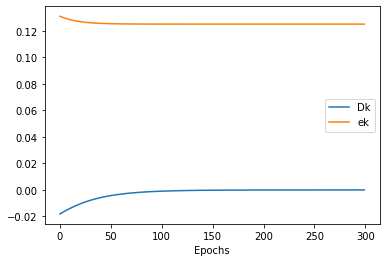

[[0.50117478]
 [0.5012406 ]
 [0.50124242]
 [0.50129607]]


In [11]:
# create input vector X of size 2
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [1], [1], [0]])

# create weight matrix Wi of size 2x2
Wi = np.random.rand(2, 2)         # Input layer

# create weight matrix Wj, Wk of size 2x1
Wj = np.random.rand(2, 1)               # Hidden layer
Wk = np.random.rand(1, 1)                # Output layer

# group all weight matrices in a list
W = [Wi, Wj, Wk]

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def der_sigmoid(x):
    return sigmoid(x) * (1 - sigmoid(x))

def forward(X, W, Y):
    Ys, Vs = [], []
    for w in W:
        Ys.append(X)
        V = np.dot(X, w)
        Vs.append(V)
        X = sigmoid(V)
    return X, Ys, Vs

Dks, eks = [], []
for i in range(300):
    Ye, Ys, Vs = forward(X, W, Y)
    ek = Ye - Y
    DW = -ek * der_sigmoid(Vs[-1]) * Ys[-1]
    Dk = np.mean(DW)
    W[-1] = W[-1] + Dk
    Dks.append(Dk)
    eks.append(np.mean(ek * ek / 2))

# plot Dks
import matplotlib.pyplot as plt
plt.plot(Dks)
plt.plot(eks)
# plot legend and show plot
plt.legend(['Dk', 'ek'])
# set X axis title to Epochs
plt.xlabel('Epochs')
plt.show()
print(Ye)